 # Task -- Regression
 First, let’s see how ratings can be predicted as a function of (a) whether a review is a ‘verified purchase’, and (b) the length of the review (in characters).

 ## Problem 1
 What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot (1 mark).

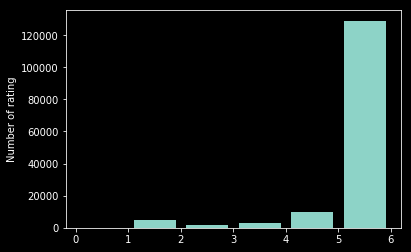

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./Homework1/amazon_reviews_us_Gift_Card_v1_00.tsv', delimiter='\t').dropna()
plt.hist(data['star_rating'], bins=[0,1,2,3,4,5,6],rwidth=0.8)
plt.xticks(range(0, 7))
plt.ylabel('Number of rating')
plt.show()



 ## Problem 3
 Train a simple predictor to predict the star rating using two features:

 star_rating ≃ θ0 + θ1 × [review is verified] + θ2 × [review length].

 Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review length’ is negative, what would that say about verified versus unverified reviews (1 mark)?

In [2]:
# Data preprocessing
data['verified_purchase_int'] = data.apply(lambda x: int(x['verified_purchase'] == "Y"), axis = 1)
data['review_body_length'] = data.apply(lambda x: len(x['review_body']), axis = 1)
data['theta_zero'] = 1



In [3]:
# Define My Own Regression
def myRegression(featureNames, labelName, data):
    X, y = data[featureNames], data[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    print("Theta: ", theta)
    print("MSE: ", MSE)

featureNames = ['theta_zero', 'verified_purchase_int', 'review_body_length']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)



Theta:  [ 4.84501720e+00  4.98738862e-02 -1.24542755e-03]
MSE:  0.6508730403935653
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


 Explanation.

 ## Problem 4
 Train another predictor that only uses one feature:

 star rating ≃ θ0 + θ1 × [review is verified]

 Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature. Provide an explanation as to why these coefficients might vary so significantly (1 mark).1

In [4]:
featureNames = ['theta_zero', 'verified_purchase_int']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)



Theta:  [4.5781106  0.16796432]
MSE:  0.6854213460544826
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


 ## Problem 5
 Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the same model as above on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

In [5]:
def trainByRatio(ratio, data, featureNames, labelName):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    # Training
    print("================ For ratio ", ratio, "================")
    print("================ Training ================")
    myRegression(featureNames, labelName, train)

    # Testing
    print("================ Testing ================")
    myRegression(featureNames, labelName, test)
    


In [6]:
trainByRatio(0.9, data, featureNames, labelName)



================ For ratio  0.9 ================
================ Training ================
Theta:  [4.43958076 0.31645341]
MSE:  0.6555052667672866
================ Testing ================
Theta:  [ 4.71570729 -0.1220213 ]
MSE:  0.924076433012882
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


 ## Problem 6
 Repeat the above experiment, varying the size of the training and test fractions between
 5% and 95% for training (using the complement for testing). Show how the training and test error vary
 as a function of the training set size (again using a simple plot or table). Does the size of the training
 set make a significant difference in testing performance? Comment on why it might or might not make
 a significant difference in this instance (2 marks).

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


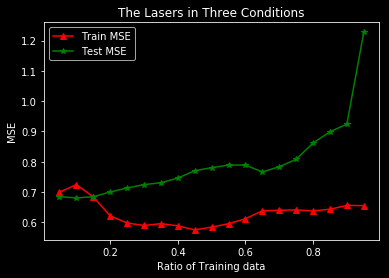

In [7]:
# To plot a graph, let's revise the function 
def myRegression(featureNames, labelName, data, MSEList):
    X, y = data[featureNames], data[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    MSEList.append(MSE)

def trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    # Training
    myRegression(featureNames, labelName, train, trainMSE)

    # Testing
    myRegression(featureNames, labelName, test, testMSE)

trainMSE, testMSE = [], []
ratios = [i/100 for i in list(range(5, 100, 5))]

for ratio in ratios:
    trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE)

plt.plot(ratios, trainMSE, 'r^-', label='Train MSE')
plt.plot(ratios, testMSE, 'g*-', label='Test MSE')
plt.title('The Lasers in Three Conditions')
plt.xlabel('Ratio of Training data')
plt.ylabel('MSE')
plt.legend()
plt.show()

